In [2]:
import twitter
import pandas as pd
import matplotlib.pyplot as plt
import pandas

In [43]:



api = twitter.Api(consumer_key=consumer_key,
                              consumer_secret=consumer_secret,
                              access_token_key=access_token_key,
                              access_token_secret=access_token_secret)

print(api.VerifyCredentials())

api.GetFollowers()

timeline = api.GetUserTimeline(screen_name='BernieSanders', count=10000)

timeline[0]

def convert_twitter_output(timeline):
    output = []
    for tweet in timeline:
        tw ={'created':tweet.created_at,'text':tweet.text, 'favorite_count':tweet.favorite_count}
        output.append(tw)
    return output
    

tweets = convert_twitter_output(timeline)

df = pd.DataFrame(tweets)

{"created_at": "Mon Jun 15 22:05:34 +0000 2020", "default_profile": true, "description": "Cosmologists with interest in Earth", "favourites_count": 18, "followers_count": 1, "friends_count": 35, "id": 1272650783918448640, "id_str": "1272650783918448640", "name": "Vanessa Boehm", "profile_background_color": "F5F8FA", "profile_banner_url": "https://pbs.twimg.com/profile_banners/1272650783918448640/1592260389", "profile_image_url": "http://pbs.twimg.com/profile_images/1272658299679150081/hcWVZGJh_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1272658299679150081/hcWVZGJh_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "VanessaBoehm8", "status": {"created_at": "Wed Jun 17 23:10:48 +0000 2020", "favorited": true, "id": 1273392682266591233, "id_str": "1273392682266591233", "lang": "en", "media": [{"d

In [77]:
df['text']

0      walmart largest employer owned walton wealthie...
1      going bring transformative change country take...
2      two year ago amazon raised minimum wage hour t...
3      son many child life matter daughter life matte...
4      narcissism trump order hear cheer adoring crow...
                             ...                        
195    denmark starting pay mcdonalds hour worker get...
196    seven largest covid hotspot america prison jai...
197    rigged corrupt economy look likestock market b...
198    catastrophic need keep every employee payroll ...
199    coronavirus crisis devastating effect american...
Name: text, Length: 200, dtype: object

In [45]:
import re

In [46]:
# cleaning 

def remove_url(txt):
    return re.sub(r"http\S+", "", txt)
    
def remove_rt(txt):
    return re.sub(r"RT", "", txt)
      
def remove_hashtag(txt):
    return re.sub(r'#\S+','', txt)

def remove_mentions(txt):
    return re.sub(r'@\S+','', txt)

def remove_controls(txt):
    return re.sub(r'[\n\r\t\f\v]','',txt)

def remove_whitespaces(txt):
    return re.sub(r'  +',' ',txt)

def remove_whitespaces_start_end(txt):
    return re.sub(r'^\s+|\s+$','',txt)

def remove_numbers(txt):
    return re.sub(r'\d','',txt)

def remove_emojis(txt):
    return re.sub(r'&amp','',txt)

def remove_special_characters(txt):
    return re.sub(r'[^\w ]+','',txt)


function_list=[remove_whitespaces_start_end, remove_url, remove_rt, remove_controls, remove_emojis, remove_mentions, remove_hashtag, remove_whitespaces, remove_numbers, remove_special_characters]

In [47]:
for func in function_list:
    df['text'] = df['text'].apply(lambda x: func(x))

In [48]:
print(df['text'])

0      Walmart our largest employer is owned by the W...
1      If were going to bring about transformative ch...
2      Two years ago Amazon raised their minimum wage...
3      My son and so many other children their lives ...
4      This is what narcissism is about Trump in orde...
                             ...                        
195    In Denmark starting pay at McDonalds is about ...
196     Seven of the  largest COVID hotspots in Ameri...
197    This is what a rigged and corrupt economy look...
198    This is catastrophic We need to keep every emp...
199    The coronavirus crisis has had a devastating e...
Name: text, Length: 200, dtype: object


In [49]:
import nltk
#nltk.download()

In [50]:
from nltk.tokenize import RegexpTokenizer

In [51]:
tokenizer = RegexpTokenizer(r'\w+')
    
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [52]:
from nltk.corpus import stopwords

def remove_stopwords(x):
    return [ww for ww in x if ww not in stopwords.words('english')]

df['text'] = df['text'].apply(lambda x: remove_stopwords(x)) 

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [54]:
def word_lemmatizer(x):
    return [lemmatizer.lemmatize(ww) for ww in x]

df['text'] = df['text'].apply(lambda x: word_lemmatizer(x)) 

In [55]:
def resolve_lists(x):
    return " ".join(ww for ww in x)

In [56]:
df['text'] = df['text'].apply(lambda x: resolve_lists(x)) 

In [57]:
from textblob import TextBlob

In [58]:
def senti(x):
    return TextBlob(x).sentiment 

df['sentiment']=df['text'].apply(lambda x: senti(x).polarity)
df['subjectivity']=df['text'].apply(lambda x: senti(x).subjectivity)

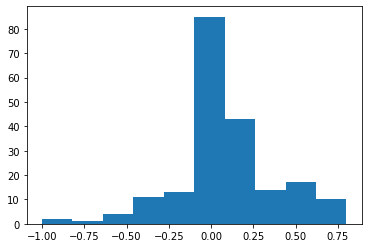

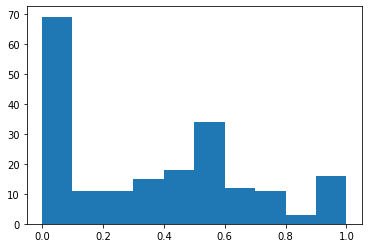

In [59]:
plt.hist(df['sentiment'])
plt.show()
plt.hist(df['subjectivity'])
plt.show()

In [60]:
df = df[df['text']!='']

In [61]:
df['favorite_count']

0       28348
1        1968
2       62833
3        2678
4       13455
        ...  
195    192873
196         0
197     39713
198     22474
199      3029
Name: favorite_count, Length: 200, dtype: int64

In [78]:
word2count = {} 
for data in df['text']: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [79]:
word2count_summary = {k: v for k, v in sorted(word2count.items(), key=lambda item: item[1],reverse=True)}
word2count_summary 

{'must': 25,
 'people': 21,
 'trump': 18,
 'country': 16,
 'american': 16,
 'justice': 15,
 'state': 15,
 'need': 15,
 'million': 14,
 'join': 13,
 'u': 13,
 'pandemic': 12,
 'health': 12,
 'right': 12,
 'life': 11,
 'today': 10,
 'police': 10,
 'crisis': 10,
 'running': 10,
 'worker': 10,
 'family': 9,
 'many': 9,
 'progressive': 9,
 'community': 9,
 'working': 9,
 'unemployment': 9,
 'can': 9,
 'not': 9,
 'im': 8,
 'one': 8,
 'end': 8,
 'let': 8,
 'tonight': 8,
 'republican': 8,
 'time': 8,
 'live': 8,
 'going': 7,
 'congress': 7,
 'president': 7,
 'government': 7,
 'criminal': 7,
 'billion': 7,
 'coronavirus': 7,
 'town': 7,
 'new': 7,
 'reform': 7,
 'change': 6,
 'special': 6,
 'wage': 6,
 'benefit': 6,
 'attorney': 6,
 'continue': 6,
 'dont': 6,
 'th': 6,
 'sen': 6,
 'virtual': 6,
 'job': 6,
 'act': 6,
 'every': 6,
 'paycheck': 6,
 'vaccine': 6,
 'america': 5,
 'take': 5,
 'science': 5,
 'hall': 5,
 'congratulation': 5,
 'economic': 5,
 'leader': 5,
 'jail': 5,
 'struggle': 5,
 'l

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [87]:
vec = CountVectorizer()
vec.fit(df.text.values)
features = vec.transform(df.text.values).toarray()

In [97]:
n_clusters = 3
cls = KMeans(n_clusters=n_clusters)
cls.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
clusters = cls.predict(features)

In [99]:
max(clusters)

2

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

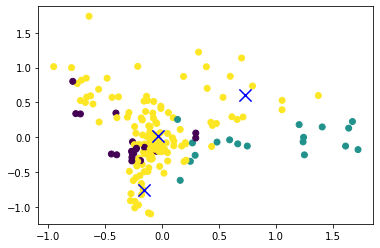

In [101]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.fit_predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.show()

In [102]:
# how well are they correlated 
import numpy as np
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))


0.014373830167460433

7     congratulation rick krajewski nikil saval prog...
9     progressive elected official area benefit comm...
14    helped lead passage legislation washington sta...
26    state district attorney prosecutor front line ...
65    former state federal public defender immigrant...
Name: text, dtype: object
mean likes: 1492.9333333333334 1162.5363568303492


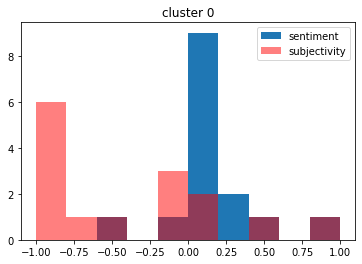

0    walmart largest employer owned walton wealthie...
1    going bring transformative change country take...
2    two year ago amazon raised minimum wage hour t...
3    son many child life matter daughter life matte...
4    narcissism trump order hear cheer adoring crow...
Name: text, dtype: object
mean likes: 26429.11046511628 73718.30382230738


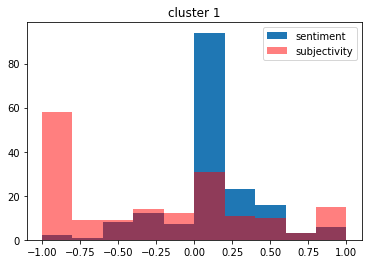

6     people cry police brutality murder pandemic sp...
19    one reason need end mass incarceration america...
32    country american people demanding justice end ...
53    people cannot survive dignity without decent j...
70    instead spending billion year jail incarcerati...
Name: text, dtype: object
mean likes: 39922.153846153844 43523.22438814736


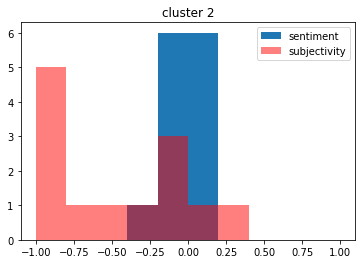

In [114]:
for ii in range(n_clusters):
    cluster = df['text'][clusters==ii]
    print(cluster.head())
    print('mean likes:', df['favorite_count'][clusters==ii].mean(),df['favorite_count'][clusters==ii].std())
    plt.title('cluster %d'%ii)
    _ = plt.hist(cluster.apply(lambda x: senti(x).polarity),label='sentiment',bins=np.linspace(-1,1,11))
    _ = plt.hist(cluster.apply(lambda x: (senti(x).subjectivity-0.5)*2),label='subjectivity',alpha=0.5,color='red',bins=np.linspace(-1,1,11))
    plt.legend()
    plt.show()

In [104]:
# number of topics to extract
n_topics = 5

vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.text)
print(features.shape)
from sklearn.decomposition import NMF, LatentDirichletAllocation
cls = NMF(n_components=n_topics)
cls.fit(features)


(200, 301)


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [105]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()
print(len(feature_names))
# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()


301
0 justice criminal reform police need real incarceration end particularly mass country killing brutality doj jail 
1 state running new right community york attorney progressive representative care house senate health organizer pennsylvania 
2 trump president life donald science pandemic country like mr want midst republican dont statement th 
3 million unemployment people american losing health filed worker benefit crisis pandemic insurance job time class 
4 join town tonight virtual live hall meeting discus crisis working coronavirus reopen safely special sen 


In [106]:
n_topics = 10


cls = LatentDirichletAllocation(n_components=n_topics)
cls.fit(features)

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 new right state health progressive york attorney care america continue benefit receive representative electing building 
1 virtual come trump midst statement vaccine decent losing future time leadership act president american reduced 
2 watch discus paycheck shouldnt primary save briefing kill earning american investing sen covid prison food 
3 running health community people organizer insurance million state medicare murder support pennsylvania senate house endorsement 
4 join live change town crisis coronavirus like district hall special im tonight state country virtual 
5 wage people wishing today need working minimum hour live billion worker survive struggle involved job 
6 led family justice capitalism unfettered wealth risk effort join leader need increased country congress fight 
7 president make trump government mr act family country way dont lose th need racism violence 
8 million pandemic life unemployment people american proud create today let died day nation seeing trump 

In [107]:
#nearest neighbors

In [111]:
from sklearn.neighbors import NearestNeighbors
vec = CountVectorizer()
vec.fit(df.text.values)
features = vec.transform(df.text.values).toarray()
knn = NearestNeighbors(n_neighbors=10, metric='l2')
knn.fit(features)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='l2',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [112]:
res = knn.kneighbors(features[0:1], return_distance=False)[0]

In [113]:
for ii in res:
    print(ii)
    print(df['text'][ii]) 

0
walmart largest employer owned walton wealthiest family america worth nearly
129
join u
130
watch
73
there doubt america moment reckoning
135
join tonight town hall
165
tune watch discus existenti
74
congratulation winning primary pennsylva
196
seven largest covid hotspot america prison jail tonight briefing senator
181
join live discus response coronavirus crisis
47
public school teacher principal understands lowincome family locked
